In [11]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')
 
x_train = train_data[:, 1:] / 255 #pixel data : make go from 0 to 1 
y_train = train_data[:, 0] #training data

x_test = test_data[:, 1:] / 255 
y_test = test_data[:, 0]

In [14]:
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state = 12345,
)

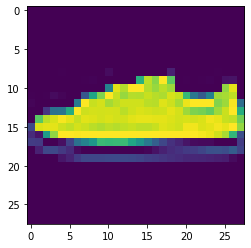

In [15]:
image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [16]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape=(im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape:{}'.format(x_train.shape))
print('x_test shape:{}'.format(x_test.shape))
print('x_valshape:{}'.format(x_validate.shape))

x_train shape:(48000, 28, 28, 1)
x_test shape:(10000, 28, 28, 1)
x_valshape:(12000, 28, 28, 1)


In [25]:
cnn_model =Sequential([
    Conv2D(filters = 32, kernel_size=3,activation = 'relu', input_shape=im_shape), #output dimension, how much overlap
    MaxPooling2D(pool_size =2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation = 'relu'),
    Dense(10,activation ='softmax')
])

In [28]:
tensorboard = TensorBoard(
    log_dir=r'logs\{}'.format('cnn_1layer'),
    write_graph=True,
    write_grads=True,
    histogram_freq=1,
    write_images=True,
)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [29]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate),
    callbacks=[tensorboard]
)


Train on 48000 samples, validate on 12000 samples









Epoch 1/10
48000/48000 [==============================] - 35s 736us/step - loss: 0.8213 - acc: 0.7136 - val_loss: 0.4831 - val_acc: 0.8302

Epoch 2/10
48000/48000 [==============================] - 30s 627us/step - loss: 0.4557 - acc: 0.8386 - val_loss: 0.4270 - val_acc: 0.8463
Epoch 3/10
48000/48000 [==============================] - 40s 829us/step - loss: 0.4034 - acc: 0.8586 - val_loss: 0.3800 - val_acc: 0.8684
Epoch 4/10
48000/48000 [==============================] - 38s 790us/step - loss: 0.3707 - acc: 0.8696 - val_loss: 0.3565 - val_acc: 0.8763
Epoch 5/10
48000/48000 [==============================] - 40s 829us/step - loss: 0.3472 - acc: 0.8783 - val_loss: 0.3365 - val_acc: 0.8819
Epoch 6/10
48000/48000 [==============================] - 40s 837us/step - loss: 0.3316 - acc: 0.8836 - val_loss: 0.3238 - val_acc: 0.8873
Epoch 7/10
48000/48000 [==============================] - 39s 823us/step - loss: 0.3154 - acc: 0.8891 - va

In [30]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

test loss: 0.3016
 test acc: 0.8962


In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
from tensorflow.examples.tutorials.mnist import input_data

In [32]:
test_data = np.array(pd.read_csv(r'fashion-mnist_test.csv'), dtype='float32')

embed_count = 1600
x_test = test_data[:embed_count, 1:] / 255
y_test = test_data[:embed_count, 0]

logdir = r'C:Users/sara/Downloads/fashionmnist/Fashion_MNIST/logdir'


In [33]:
summary_writer = tf.summary.FileWriter(logdir)

embedding_var = tf.Variable(x_test,name = 'fmnist_embedding')

config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

embedding.metadata_path = os.path.join(logdir, 'metadata.tsv')
embedding.sprite.image_path = os.path.join(logdir, 'sprite.png')
embedding.sprite.single_image_dim.extend([28, 28])

projector.visualize_embeddings(summary_writer, config)

In [34]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.save(sesh,os.path.join(logdir, 'model.ckpt'))

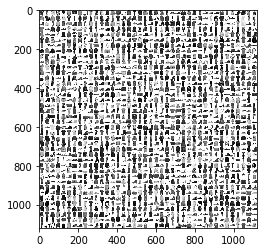

In [35]:
rows = 28
cols = 28

label = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']

sprite_dim = int(np.sqrt(x_test.shape[0]))

sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))

index = 0
labels = []
for i in range(sprite_dim):
    for j in range(sprite_dim):
        
        labels.append(label[int(y_test[index])])
        
        sprite_image[
            i * cols: (i + 1) * cols,
            j * rows: (j + 1) * rows
        ] = x_test[index].reshape(28, 28) * -1 + 1
        
        index += 1
        
with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))
        
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')
plt.imshow(sprite_image, cmap='gray')
plt.show()

In [36]:
name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='3_layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]

In [38]:
for model in cnn_models:
    model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
____

In [37]:
history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 42s 870us/step - loss: 0.7733 - acc: 0.7433 - val_loss: 0.4794 - val_acc: 0.8293
Epoch 2/50
48000/48000 [==============================] - 43s 895us/step - loss: 0.4449 - acc: 0.8440 - val_loss: 0.4113 - val_acc: 0.8593
Epoch 3/50
48000/48000 [==============================] - 32s 673us/step - loss: 0.3903 - acc: 0.8630 - val_loss: 0.3676 - val_acc: 0.8729
Epoch 4/50
48000/48000 [==============================] - 31s 653us/step - loss: 0.3610 - acc: 0.8743 - val_loss: 0.3377 - val_acc: 0.8840
Epoch 5/50
48000/48000 [==============================] - 32s 658us/step - loss: 0.3386 - acc: 0.8817 - val_loss: 0.3290 - val_acc: 0.8862
Epoch 6/50
48000/48000 [==============================] - 32s 671us/step - loss: 0.3206 - acc: 0.8872 - val_loss: 0.3225 - val_acc: 0.8887
Epoch 7/50
48000/48000 [==============================] - 32s 659us/step - loss: 0.3090 - acc: 0.8916 - val_loss: 0.

<function matplotlib.pyplot.show(*args, **kw)>

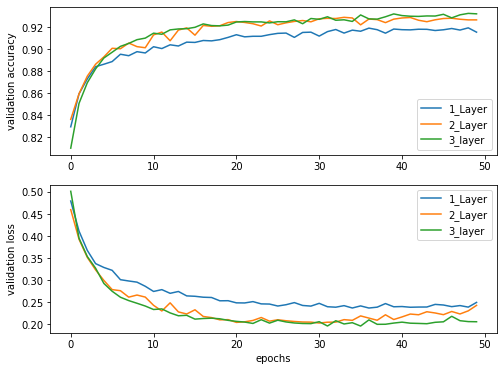

In [40]:
fig, (ax1, ax2) =plt.subplots(2, figsize = (8,6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show